Connecting to Drive

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Necessary Datasets

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading Simple Dataset which is the line:

$ y = \frac{2}{3}x + \frac{8}{9} + 1 $

In [170]:
df1=pd.read_csv('/content/drive/MyDrive/Datasets/Linear Regression - Sheet1.csv')
df1.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


2 outlier values

In [171]:
df1.tail()

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889
299,300,1.888889


Splitting x and y

In [172]:
x1=list(df1.iloc[:,0])
y1=list(df1.iloc[:,1])

Plotting Values

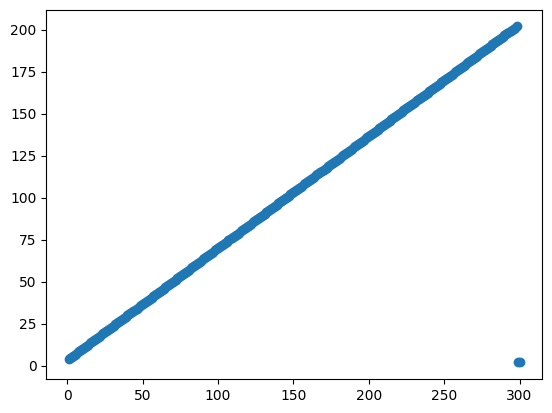

In [200]:
plt.scatter(x1,y1)
plt.show()

Using Formulas

$$ β1 = \frac{Σ(xy) - ȳΣ(x)}{Σ(x²) - x̄Σ(x)} $$

$$ \beta_0 = \bar{y} - \bar{x}\beta_1 $$

Calculation of values

In [174]:
xsum=sum(x1)
ysum=sum(y1)
xmean=xsum/len(x1)
ymean=ysum/len(y1)
xysum=0
x2sum=0
for i in range(len(x1)):
  xysum=x1[i]*y1[i]
for i in range(len(x1)):
  x2sum=x1[i]**2
print("X: ",xsum)
print("Y: ",ysum)
print("Xm: ",xmean)
print("Ym: ",ymean)
print("XY: ",xysum)
print("X2: ",x2sum)

X:  45150
Y:  30664.666668517995
Xm:  150.5
Ym:  102.21555556172665
XY:  566.6666667
X2:  90000


Equation of Regressor

In [175]:
m1=(xysum-ymean*xsum)/(x2sum-xsum*xmean)
c1=ymean-m1*xmean
print(f"y = {round(m1,4)}x + {round(c1,4)}")

y = 0.6882x + -1.3593


Plotting Actual Line vs Predicted Line

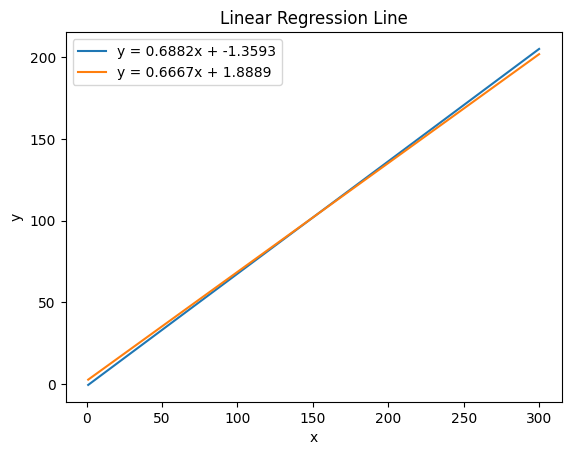

In [176]:
yl = [m1 * xi + c1 for xi in x1]
yo= [(2/3) * xi + 8/9 +1 for xi in x1]
plt.plot(x1,yl,label=f"y = {round(m1,4)}x + {round(c1,4)}")
plt.plot(x1,yo,label=f"y = {round(2/3,4)}x + {round(8/9+1,4)}")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression Line")
plt.legend()
plt.show()

MSE

In [177]:
y_pred1=[]
for i in range(len(y1)):
  y_pred1.append(x1[i]*m1+c1)

In [178]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1, y_pred1)
print("Mean Squared Error:", mse)

Mean Squared Error: 279.6250347270243


Larger Dataset

In [179]:
df2=pd.read_csv('/content/drive/MyDrive/Datasets/linearRawData.csv')
df2.head()

,Unnamed: 0,feature1,target
0,0,-0.445142,23.136758
1,1,0.072545,118.460441
2,2,-1.366360,-119.291554
3,3,0.065654,-161.423879
4,4,-0.321074,-158.935795


Dropping Unnamed Column

In [180]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

Splitting into x and y

In [181]:
x2=list(df2.iloc[:,0])
y2=list(df2.iloc[:,1])

Plotting the values

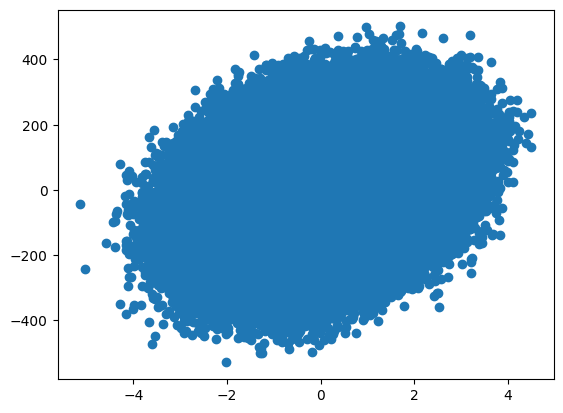

In [302]:
plt.scatter(x2,y2)
plt.show()

Calculation of Values

In [183]:
xsum=sum(x2)
ysum=sum(y2)
xmean=xsum/len(x2)
ymean=ysum/len(y2)
xysum=0
x2sum=0
for i in range(len(x2)):
  xysum=x2[i]*y2[i]
for i in range(len(x2)):
  x2sum=x2[i]**2
print("X: ",xsum)
print("Y: ",ysum)
print("Xm: ",xmean)
print("Ym: ",ymean)
print("XY: ",xysum)
print("X2: ",x2sum)

X:  21.663222661695272
Y:  -133482.31411807355
Xm:  2.1663222661695274e-05
Ym:  -0.13348231411807354
XY:  98.61674609358582
X2:  1.636103567159112


Regressor Equation

In [184]:
m2=(xysum-ymean*xsum)/(x2sum-xsum*xmean)
c2=ymean-m2*xmean
print(f"y = {round(m2,4)}x + {round(c2,4)}")

y = 62.0606x + -0.1348


Plotting Regression Line

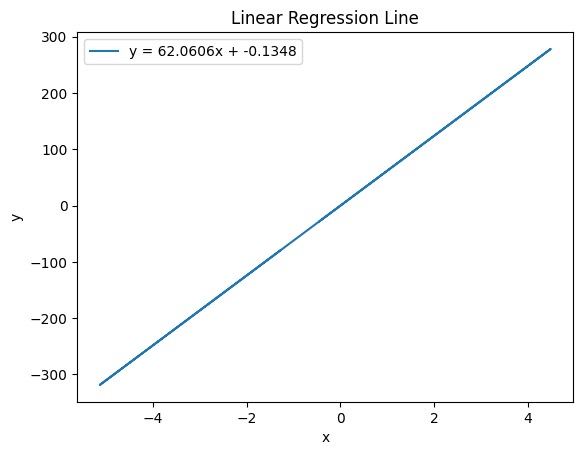

In [185]:
yl = [m2 * xi + c2 for xi in x2]
plt.plot(x2,yl,label=f"y = {round(m2,4)}x + {round(c2,4)}")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression Line")
plt.legend()
plt.show()

Predicted Values

In [186]:
y_pred2=[]
for i in range(len(y2)):
  y_pred2.append(x2[i]*m2+c2)

MSE

In [187]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y2, y_pred2)
print("Mean Squared Error:", mse)

Mean Squared Error: 11693.822404935865


From Sklearn Library

In [188]:
from sklearn.linear_model import LinearRegression
x2r=np.array(x2).reshape(-1, 1)
y2r=np.array(y2).reshape(-1, 1)
lr2model=LinearRegression()
lr2model.fit(x2r,y2r)
y_pred=lr2model.predict(x2r)
mse = mean_squared_error(y2r, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10798.022793019198


Regressor Equation

In [189]:
mp=lr2model.coef_[0][0]
cp=lr2model.intercept_[0]
print(f"y = {round(mp,4)}x + {round(cp,4)}")

y = 32.1107x + -0.1342


Plotting Regressor Line

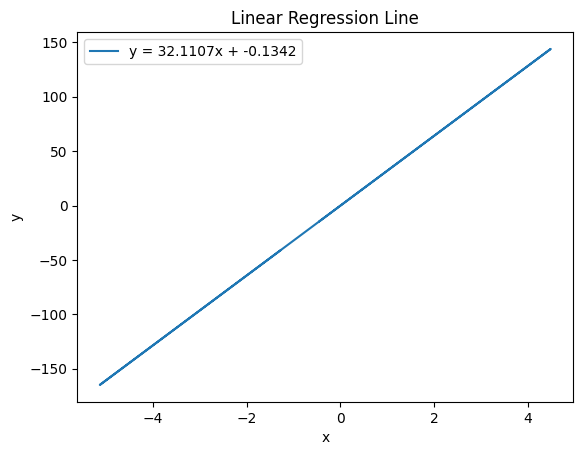

In [190]:
yl = [mp * xi + cp for xi in x2]
plt.plot(x2,yl,label=f"y = {round(mp,4)}x + {round(cp,4)}")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression Line")
plt.legend()
plt.show()

Gpa Dataset

In [191]:
df3=pd.read_csv('/content/drive/MyDrive/Datasets/Simple linear regression.csv')
df3.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Splitting into x and y

In [192]:
x3=list(df3.iloc[:,0])
y3=list(df3.iloc[:,1])

Plotting Values

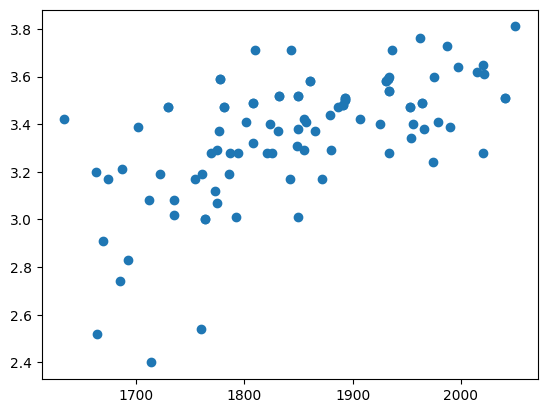

In [193]:
plt.scatter(x3,y3)
plt.show()

Calculation of values

In [194]:
xsum=sum(x3)
ysum=sum(y3)
xmean=xsum/len(x3)
ymean=ysum/len(y3)
xysum=0
x2sum=0
for i in range(len(x3)):
  xysum=x3[i]*y3[i]
for i in range(len(x3)):
  x2sum=x3[i]**2
n=len(x3)
print("n: ",n)
print("X: ",xsum)
print("Y: ",ysum)
print("Xm: ",xmean)
print("Ym: ",ymean)
print("XY: ",xysum)
print("X2: ",x2sum)

n:  100
X:  185076
Y:  336.0499999999999
Xm:  1850.76
Ym:  3.360499999999999
XY:  6383.0199999999995
X2:  3161284


Regressor Equation

In [195]:
m3=(xysum-ymean*xsum)/(x2sum-xsum*xmean)
c3=ymean-m3*xmean
print(f"y = {round(m3,4)}x + {round(c3,4)}")

y = 0.0018x + 0.0035


Plotting Regressor Line and actual values

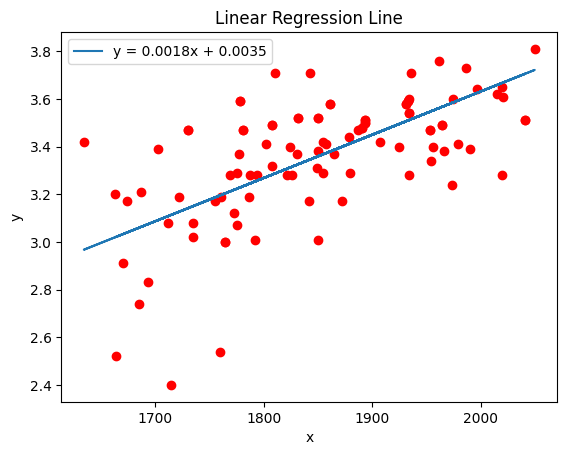

In [196]:
yl = [m3 * xi + c3 for xi in x3]
plt.plot(x3,yl,label=f"y = {round(m3,4)}x + {round(c3,4)}")
plt.scatter(x3,y3,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression Line")
plt.legend()
plt.show()

MSE

In [197]:
mse = mean_squared_error(y3, yl)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04209445813402794


Sklearn Library

In [198]:
from sklearn.linear_model import LinearRegression
x3r=np.array(x3).reshape(-1, 1)
y3r=np.array(y3).reshape(-1, 1)
lr3model=LinearRegression()
lr3model.fit(x3r,y3r)
score=lr3model.score(x3r,y3r)
y_pred3=lr3model.predict(x3r)
m3p=lr3model.coef_[0][0]
c3p=lr3model.intercept_[0]
mse = mean_squared_error(y3, y_pred3)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04144211890322454


Plotting Regressor Line

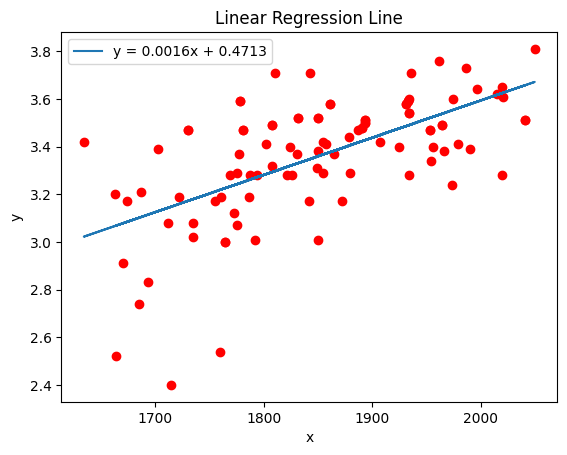

In [199]:
yl = [m3p * xi + c3p for xi in x3]
plt.plot(x3,yl,label=f"y = {round(m3p,4)}x + {round(c3p,4)}")
plt.scatter(x3,y3,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression Line")
plt.legend()
plt.show()

Multiple Linear Regression

In [202]:
df4=pd.read_csv('/content/drive/MyDrive/Datasets/Student_Performance.csv')
df4.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [205]:
df4=df4.drop('Extracurricular Activities',axis=1)
df4.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


Using Formulas from Simple Linear Regression

Regression Coefficient

In [218]:
def regcoef(x,y):
  xsum=sum(x)
  ysum=sum(y)
  xmean=xsum/len(x)
  ymean=ysum/len(y)
  xysum=0
  x2sum=0
  for i in range(len(x)):
    xysum=x[i]*y[i]
  for i in range(len(x)):
    x2sum=x[i]**2
  m=(xysum-ymean*xsum)/(x2sum-xsum*xmean)
  return m

Regression intercept

In [222]:
def regintercept(b1,xm,ym):
  c=ym
  for i in range(len(b1)):
    c=c-b1[i]*xm[i]
  return c

Splitting x and y

In [207]:
y=df4.iloc[:,-1]
x=df4.iloc[:,:-1]

Numeric Columns of dataset

In [212]:
num_col=[]
for i in x:
  num_col.append(i)
print(num_col)

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']


Calculating βᵢ for all numeric columns

Calculating $ \beta_0 $

$ \beta_0 = \bar{y} - b_1 \bar{x}_1 - b_2 \bar{x}_2     \dots - b_k \bar{x}_k $

In [219]:
b1=[]
xm=[]
ym=y.mean()
for i in num_col:
  b1.append(regcoef(df4[i],y))
  xm.append(df4[i].mean())
print(b1)
print(xm)
print(ym)

[11.061043180408252, 0.7952148338743703, 8.456381841644477, 12.048887594733127]
[4.9929, 69.4457, 6.5306, 4.5833]
55.2248


In [223]:
c=regintercept(b1,xm,ym)
print(c)

-165.67504705223348


Regressor Equation

In [237]:
s="y = "
for i in range(len(b1)):
  s=s+str(round(b1[i],2))+"x"+str(i)+" + "
s=s+str(round(c,2))
print(s)

y = 11.06x0 + 0.8x1 + 8.46x2 + 12.05x3 + -165.68


Prediction using formula

$ y = 11.06 x_0 + 0.8 x_1 + 8.46 x_2 + 12.05 x_3 - 165.68 $

In [241]:
def ypred(x):
  yp=c
  for i in range(len(x)):
    yp=yp+x[i]*b1[i]
  return yp

In [245]:
y_pred=[]
for i in range(len(x)):
  y_pred.append(ypred(x.iloc[i]))

Regression Scores

In [250]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 1838.0457027117066
Mean Absolute Error (MAE): 35.23367822989346
R-squared (R²) Score: -3.980000236289193


Using Sklearn Library

In [254]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
score=model.score(x,y)
y_pred=model.predict(x)
print("Score: ",score)

Score:  0.9884981216772581


Regression Scores

In [255]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 4.245176108662532
Mean Absolute Error (MAE): 1.6375973348711335
R-squared (R²) Score: 0.9884981216772581


Regression scores using simple linear regression formula is not giving accurate results

Using Formula


$$ \beta = (X^\top X)^{-1} X Y $$

Adding Weights 1 Column

In [267]:
n=len(x)
dfw = x.assign(wt=[1]*n)
dfw=dfw[dfw.columns[::-1]]
dfw.head()

,wt,Sample Question Papers Practiced,Sleep Hours,Previous Scores,Hours Studied
0,1,1,9,99,7
1,1,2,4,82,4
2,1,2,7,51,8
3,1,2,5,52,5
4,1,5,8,75,7


Convert to numpy array

In [270]:
x=dfw.to_numpy()
y=y.to_numpy()

Checking shapes of x and y

In [271]:
x.shape

(10000, 5)

In [272]:
y.shape

(10000,)

Calculating using formula

In [283]:
xt=np.transpose(x)
xtxinv=np.linalg.inv(np.dot(xt,x))
b=np.dot(np.dot(xtxinv,xt),y)
print(b)

[-33.76372609   0.1951983    0.47633298   1.01858354   2.85342921]


Getting $ \beta_0 , \beta_1 \dots \beta_k $

In [284]:
b0=b[0]
bs=(b[1:])

Regressor Equation

In [285]:
eq="y = "
for i in range(len(bs)):
  eq=eq+str(round(bs[i],2))+"x"+str(i)+" + "
eq=eq+str(round(b0,2))
print(eq)

y = 0.2x0 + 0.48x1 + 1.02x2 + 2.85x3 + -33.76


Predicting using equation

$ y = 0.2x_0 + 0.48x_1 + 1.02x_2 + 2.85x_3 - 33.76 $

In [287]:
def mwpred(x):
  y=b0+np.dot(bs,x)
  return y

Splitting x and y

In [295]:
yc=df4.iloc[:,-1]
xc=df4.iloc[:,:-1]
xc=xc[xc.columns[::-1]]

Checking Prediction

In [296]:
xc.iloc[0]

Sample Question Papers Practiced     1
Sleep Hours                          9
Previous Scores                     99
Hours Studied                        7
Name: 0, dtype: int64

In [297]:
yc.iloc[0]

91.0

In [298]:
mwpred(xc.iloc[0])

91.53224385796966

Predicting for all values

In [299]:
y_pred=[]
for i in range(len(xc)):
  y_pred.append(mwpred(xc.iloc[i]))
print(y_pred)

[91.53224385796966, 63.46956944639553, 44.73619555683961, 36.24182548768936, 67.39069913843252, 59.70426417432517, 64.11973141214287, 37.97648856649791, 63.13541289633242, 70.20925762263326, 84.6361330412233, 72.78020165309673, 27.347381293923164, 33.526004027737336, 65.86743677133435, 47.772073928836754, 68.01176297932295, 71.62401035997269, 30.60876001564872, 60.23151624401688, 72.42040025399555, 85.42786573121631, 71.79783934374223, 59.222158586837374, 40.37375018376775, 53.477581859185186, 63.68553883540495, 81.50734174684831, 74.37740354786555, 74.66686526569083, 40.850083165745524, 35.51014924000828, 56.41905023944158, 48.88934299523299, 59.32796721902222, 75.81352559809591, 42.14267828527422, 69.45621206206124, 30.065757180873163, 64.14807725875482, 47.77072343004979, 38.971893156235346, 55.34091995243241, 38.32810950366703, 71.13343116940092, 54.699837297438016, 16.223126153477665, 55.08311078646201, 56.939325775412264, 54.9220309419235, 26.973187115652102, 65.65026345411394, 7

Regression Scores

In [300]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(yc, y_pred)
mae = mean_absolute_error(yc, y_pred)
r2 = r2_score(yc, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 4.245176108662533
Mean Absolute Error (MAE): 1.6375973348711341
R-squared (R²) Score: 0.9884981216772581


These values match the ones obtained from the sklearn library